In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

### My Implementation

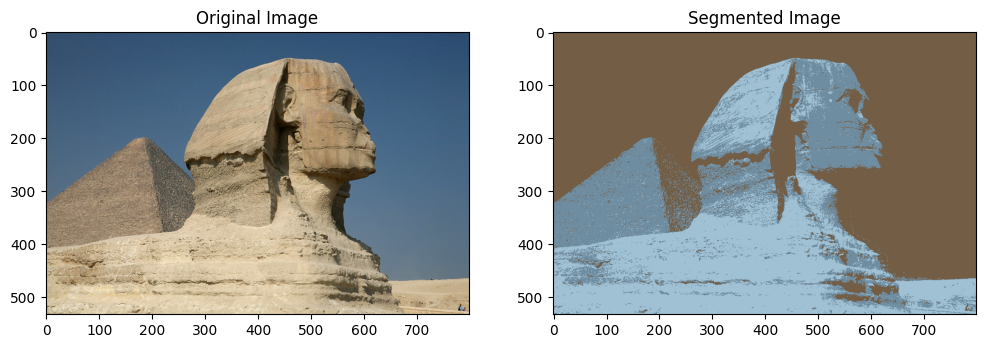

True

In [ ]:
# Load the image
image_path = "sphinx.jpg"
image = cv2.imread(image_path)

pixel_data = image.reshape(-1, 3).astype(float)

def calculate_distances(data, centroids):
    return np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

def initialize_centroids(data, K):
    indices = np.random.choice(data.shape[0], K, replace=False)
    return data[indices]

def kmeans(data, K, max_iterations=100, tolerance=1e-4):
    centroids = initialize_centroids(data, K)

    for _ in range(max_iterations):
        distances = calculate_distances(data, centroids)

        cluster_indices = np.argmin(distances, axis=1)

        new_centroids = np.array(
            [data[cluster_indices == k].mean(axis=0) for k in range(K)])

        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break  

        centroids = new_centroids 

    return cluster_indices, centroids


K = 3  

cluster_indices, centroids = kmeans(pixel_data, K)

segmented_image_data = centroids[cluster_indices].astype(int) 

segmented_image = segmented_image_data.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image.astype(int))  
plt.show()

cv2.imwrite("kmeans_segmented.jpg", segmented_image)

### OpenCV Function

In [18]:
image = cv2.imread("sphinx.jpg")
Z = image.reshape((-1, 3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imwrite("kmeans_cv.jpg", res2)

True

---

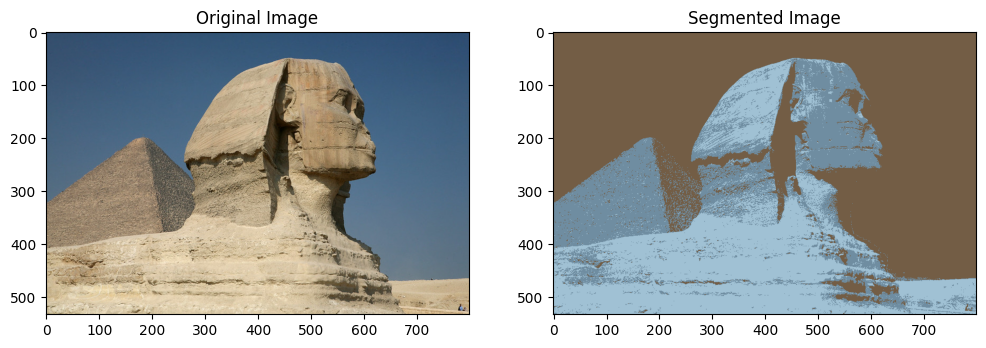

True

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids randomly with `np.random.choice`


def initialize_centroids(data, K):
    return data[np.random.choice(data.shape[0], K, replace=False)]

# Function to calculate Euclidean distances efficiently using broadcasting


def calculate_distances(data, centroids):
    return np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

# K-means clustering function


def kmeans(data, K, max_iterations=100, tolerance=1e-4):
    centroids = initialize_centroids(data, K)

    for iteration in range(max_iterations):
        distances = calculate_distances(data, centroids)

        # Assign each point to the nearest centroid
        cluster_indices = np.argmin(distances, axis=1)

        # Update centroids by averaging points in each cluster
        new_centroids = np.array(
            [data[cluster_indices == k].mean(axis=0) for k in range(K)])

        # Check for convergence with relative tolerance
        if np.allclose(new_centroids, centroids, rtol=tolerance):
            break  # Convergence achieved

        centroids = new_centroids  # Update centroids for the next iteration

    return cluster_indices, centroids


# Load the image
image_path = "sphinx.jpg"  # Your image path
image = cv2.imread(image_path)

# Flatten the image into a 2D array with RGB values
pixel_data = image.reshape(-1, 3).astype(float)  # Using float for computations

# Perform K-means clustering
K = 3  # Adjust the number of clusters as needed
cluster_indices, centroids = kmeans(pixel_data, K)

# Create the segmented image by assigning each pixel the color of its centroid
segmented_image_data = centroids[cluster_indices].astype(int)

# Reshape the segmented image data to the original image shape
segmented_image = segmented_image_data.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
# Convert BGR to RGB for proper visualization
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image.astype(int))  # Display the segmented image
plt.show()

# Save the segmented image
cv2.imwrite("kmeans_segmented.jpg", segmented_image)

---
---

In [ ]:
img = cv2.imread("sphinx.jpg")
z = img.reshape((-1, 3))
z = np.float32(z)

In [ ]:
def distance_from_centers(p, centers):
    return np.array([np.sqrt(np.sum(np.square(p - i))) for i in centers])

    # res = []
    # for c in centers:
    #     sq = np.square(p - c)
    #     sm = np.sum(sq)
    #     print(sm)
    #     res.append(np.sqrt(sm))
    # return np.ndarray(res)


In [ ]:
# def kmeans(samples, k, n_attempts, epsilon=None, max_itr=None):
#     for _ in range(n_attempts):
#         intial_centers = np.random.uniform(np.min(samples), np.max(samples), k)

#     return intial_centers


# km = kmeans(z, 2, None, None)
# km

In [ ]:
def kmeans(samples, k, epsilon=None, max_itr=None):
    initial_centers = (np.max(samples) - np.min(samples)) * np.random.random((k, 3)) + np.min(samples)
    labels = np.zeros(samples.shape[0])

    if epsilon is not None:
        ep = 0
        while(ep < epsilon):
            for i, s in enumerate(samples):
                distances = distance_from_centers(s, initial_centers)
                nearest_centroid_idx = np.argmin(distances)
                labels[i] = nearest_centroid_idx
            # for center in initial_centers:
            ep += 1

    return initial_centers

c = kmeans(z, 3, 1)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
